# Import Libraries

Libraries used: Keras, numpy, matplotlib, sklearn

In [10]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.utils import class_weight
from keras import regularizers
from keras import optimizers


# from sklearn.metrics import classification_report, confusion_matrix
# from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
# import glob

# CNN for Gender Detection

Note: We decided to create the modeling and training the model in one block for code readability and reusability.

In [4]:
"""
    Code block to create Gender model and train it.

"""

def create_gender_model():
    
    model = Sequential()
    
    model.add(Conv2D(32, kernel_size=3, input_shape=(150, 150, 3), padding='same'))
    model.add(Activation('relu'))
    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(32, kernel_size=3, padding='same'))
    model.add(Activation('relu'))
    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))
    
    model.add(Conv2D(32, kernel_size=3, padding='same'))
    model.add(Activation('relu'))
    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    
    model.add(Flatten())  
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dropout(0.3))
    
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dropout(0.3))
    
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    
    #loss function, optimizer and metric for accurary specified below.
    
    model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['binary_accuracy'])
    return model

batch_size = 32 

#instantiate the CNN
gender_model = create_gender_model()


# ImageDataGenerator is an in-built module which ensures that the images are generated randomly from the dataset 
# ensuring randomness and reducing any bias due to data distribution.

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

# flow_from_directory is a method of train_datagen which ensures that the image found in a particular directory
# name belongs to the same class as the folder's name.

train_generator = train_datagen.flow_from_directory(
    'Data/train_gender',  #target directory
    target_size=(150, 150),  #resize image to 150 x 150 pixels
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='binary')  

#similar to train_generator, val_generator is produced for validation later on.

val_generator = val_datagen.flow_from_directory(
    'Data/val_gender',
    target_size=(150, 150),
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='binary')


# training data using model.fit module in Keras

STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=val_generator.n//val_generator.batch_size

gmodel = gender_model.fit(
    train_generator,
    steps_per_epoch=STEP_SIZE_TRAIN,
    epochs=6,
    validation_data=val_generator,
    validation_steps=STEP_SIZE_VALID
   )

#prints the label names with their correspoding indices used while training.
print("[INFO]:: class indices = " + str(train_generator.class_indices))

#save trained model weights
gender_model.save_weights('gender_weights.h5')  


Found 9699 images belonging to 2 classes.
Found 1209 images belonging to 2 classes.
Epoch 1/6
303/303 [==============================] - 707s 2s/step - loss: 0.6535 - binary_accuracy: 0.6152 - val_loss: 0.6280 - val_binary_accuracy: 0.6681
Epoch 2/6
303/303 [==============================] - 238s 784ms/step - loss: 0.5570 - binary_accuracy: 0.7159 - val_loss: 0.5528 - val_binary_accuracy: 0.7061
Epoch 3/6
303/303 [==============================] - 230s 758ms/step - loss: 0.5073 - binary_accuracy: 0.7565 - val_loss: 0.5176 - val_binary_accuracy: 0.7542
Epoch 4/6
303/303 [==============================] - 230s 759ms/step - loss: 0.4726 - binary_accuracy: 0.7780 - val_loss: 0.4874 - val_binary_accuracy: 0.7652
Epoch 5/6
303/303 [==============================] - 231s 761ms/step - loss: 0.4482 - binary_accuracy: 0.7918 - val_loss: 0.4626 - val_binary_accuracy: 0.7753
Epoch 6/6
303/303 [==============================] - 236s 778ms/step - loss: 0.4228 - binary_accuracy: 0.8062 - val_loss: 0.

In [7]:
gender_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 150, 150, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 75, 75, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0

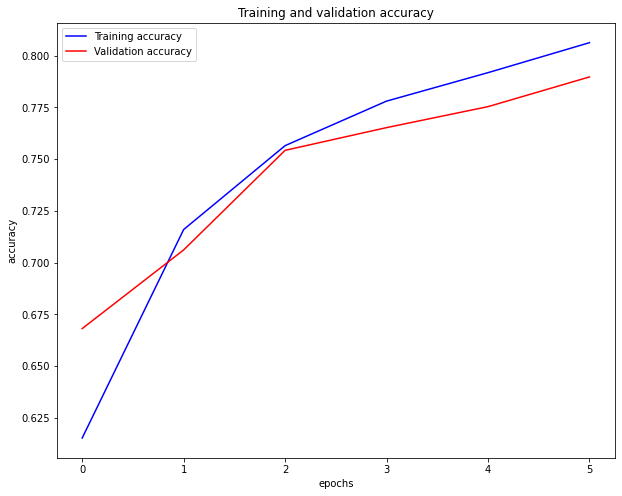

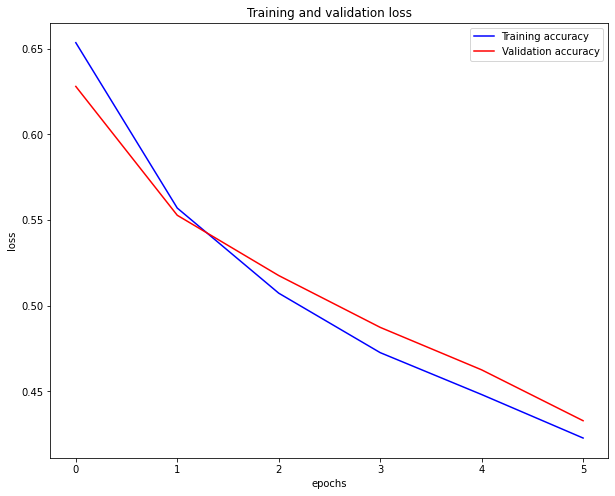

In [5]:
"""
    Code block to show the training and validation output for Gender model.

"""

accuracy = gmodel.history['binary_accuracy']
val_accuracy = gmodel.history['val_binary_accuracy']
loss = gmodel.history['loss']
val_loss = gmodel.history['val_loss']
epochs = range(len(accuracy))

fig = plt.figure(figsize=(10,8)) 
plt.plot(epochs, accuracy, 'b', label = 'Training accuracy')
plt.plot(epochs,val_accuracy,'r', label= 'Validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Training and validation accuracy')
# txt = "Fig 1.b : "               # captioning the figure
# fig.text(.5, .05, txt, ha='center')
plt.legend()
plt.show()


fig = plt.figure(figsize=(10,8))
plt.plot(epochs, loss, 'b', label = 'Training accuracy')
plt.plot(epochs,val_loss,'r', label= 'Validation accuracy')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title("Training and validation loss")
plt.legend()

plt.show()

In [8]:
"""
    Code block to test Gender Classfication model.

"""
# creating test generator to test the model
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    'Data/test_gender',
    target_size=(150, 150),
    color_mode="rgb",
    batch_size=4,
    class_mode=None,
    shuffle=False,
#     seed=42
)

STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
test_generator.reset()

# model.evaluate_generator(generator=valid_generator,
# steps=STEP_SIZE_VALID)

#predicting output label for test dataset
pred=gender_model.predict(test_generator,
steps=STEP_SIZE_TEST,
verbose=1)

# converting the predicted output data and getting desired ouput
gender_pred = [ (1 if y[0] > 0.5 else 0) for y in pred]
gender_desired = test_generator.classes

# # labels = (train_generator.class_indices)
# # labels = dict((v,k) for k,v in labels.items())
# # predictions = [labels[k] for k in y_pred]

# saving the predicted output in a text file
filenames=test_generator.filenames
results=pd.DataFrame({"Filenames":filenames, "Desired Output": gender_desired, "Predicted Output": gender_pred})
results.to_csv("gender_prediction.txt",header= False, index= False, sep =' ')


Found 1204 images belonging to 2 classes.
301/301 [==============================] - 20s 66ms/step


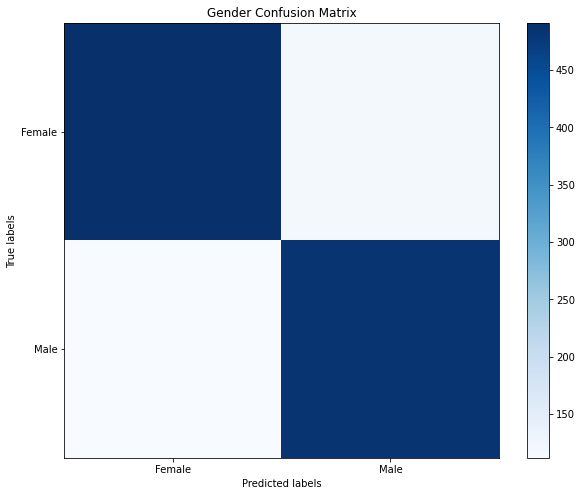

In [21]:
"""
    Code block to print the Gender Confusion Matrix.

"""

fig = plt.figure(figsize=(10, 8))
gender_confusion_matrix = confusion_matrix( gender_pred, gender_desired)
# print(gender_confusion_matrix)

plt.imshow(gender_confusion_matrix, cmap=plt.cm.Blues)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks([0, 1], ['Female', 'Male'])
plt.yticks([0, 1], ['Female', 'Male'])
plt.title('Gender Confusion Matrix')
plt.colorbar()
plt.show()

In [19]:
"""
    Code block to print the accuracy of Gender Classification CNN.

"""

gender_accuracy = accuracy_score(gender_desired,gender_pred)   
print("Accuracy of Gender Model: " + str((gender_accuracy *100))+ " %.")

# male= 0
# female =0
# for i in range(len(gender_pred)):
#     if gender_pred[i]== 0:
#         female+=1
#     else:
#         male+=1
# print(male)
# print(female)

Accuracy of Gender Model: 80.89700996677742 %.


# CNN for Age Detection

In [22]:
"""
    Code block to create Age model and train it.

"""

def create_age_model():
    model = Sequential()
    
    model.add(Conv2D(32, kernel_size=3, input_shape=(150, 150, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(32, kernel_size=3, padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))
    
    model.add(Conv2D(32, kernel_size=3, padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    
    model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dropout(0.3))
    
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dropout(0.3))
    
    model.add(Dense(8))
    model.add(Activation('softmax'))
    
    model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['categorical_accuracy'])
    return model
   
batch_size = 32

#instantiate the Age model.
age_model = create_age_model()                

# Similar to how gender_model was created and trained, ImageDataGenerator, here, as well provides images randomly 
# based on the folder's name of correspoding images which acts as lables.

train_agedatagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True)

val_agedatagen = ImageDataGenerator(rescale=1./255)

train_agegenerator = train_agedatagen.flow_from_directory(
    'Data/train_age',  # Dataset directory
    target_size=(150, 150),  
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='categorical')  

val_agegenerator = val_agedatagen.flow_from_directory(
    'Data/val_age',
    target_size=(150, 150),
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical')


# training the model
# Important :: class_weight attribute is added as a parameter to deal with data skewness.

STEP_SIZE_TRAIN=train_agegenerator.n//train_agegenerator.batch_size
STEP_SIZE_VALID=val_agegenerator.n//val_agegenerator.batch_size

amodel = age_model.fit(
    train_agegenerator,
    steps_per_epoch=STEP_SIZE_TRAIN,
    epochs=5,
    validation_data=val_agegenerator,
    validation_steps=STEP_SIZE_VALID,
    class_weight = {0: 0.842, 1 : 1.38 , 2 : 0.43 , 3 : 1 , 4 : 0.98 , 5 : 2.62 , 6 : 2.6 , 7 : 0.97}
   )

#{0: 1.9, 1:3.2, 2:1, 3:2.3 , 4:2.2 , 5:6, 6:6 , 7:2.2}

print("[INFO]:: Class indices = " + str(train_agegenerator.class_indices))

# save model weights.
age_model.save_weights('age_weights.h5')  


Found 10136 images belonging to 8 classes.
Found 1038 images belonging to 8 classes.
Epoch 1/5
316/316 [==============================] - 585s 2s/step - loss: 2.0573 - categorical_accuracy: 0.2053 - val_loss: 1.9870 - val_categorical_accuracy: 0.1982
Epoch 2/5
316/316 [==============================] - 247s 782ms/step - loss: 1.8691 - categorical_accuracy: 0.2853 - val_loss: 1.7680 - val_categorical_accuracy: 0.2832
Epoch 3/5
316/316 [==============================] - 243s 770ms/step - loss: 1.7078 - categorical_accuracy: 0.3419 - val_loss: 1.7566 - val_categorical_accuracy: 0.2646
Epoch 4/5
316/316 [==============================] - 242s 765ms/step - loss: 1.6274 - categorical_accuracy: 0.3803 - val_loss: 1.7347 - val_categorical_accuracy: 0.2549
Epoch 5/5
316/316 [==============================] - 244s 771ms/step - loss: 1.5559 - categorical_accuracy: 0.3981 - val_loss: 1.6768 - val_categorical_accuracy: 0.2871
[INFO]:: Class indices = {'(0-2)': 0, '(15-20)': 1, '(25-32)': 2, '(38-43

In [117]:
# x_count = np.bincount(train_agegenerator.classes)

# y = []
# for i in range(len(x_count)):
#     y.append(1267/x_count[i])
    
# print(y)
# print(train_agegenerator.class_indices)

[0.8368560105680317, 1.3831877729257642, 0.4376511226252159, 1.0063542494042892, 0.9836956521739131, 2.628630705394191, 2.6231884057971016, 0.9753656658968437]
{'(0-2)': 0, '(15-20)': 1, '(25-32)': 2, '(38-43)': 3, '(4-6)': 4, '(48-53)': 5, '(60-100)': 6, '(8-12)': 7}


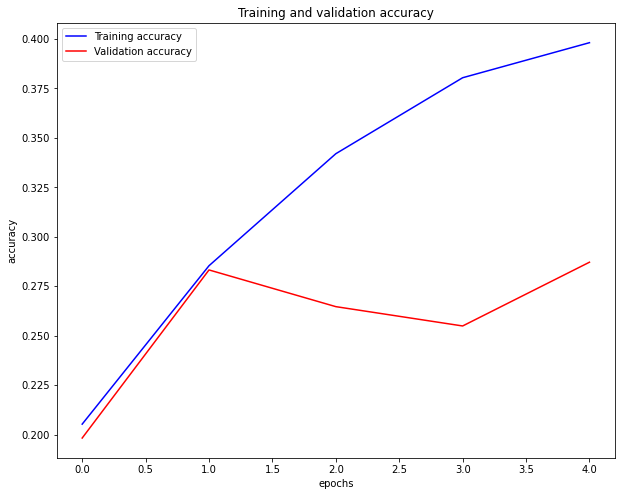

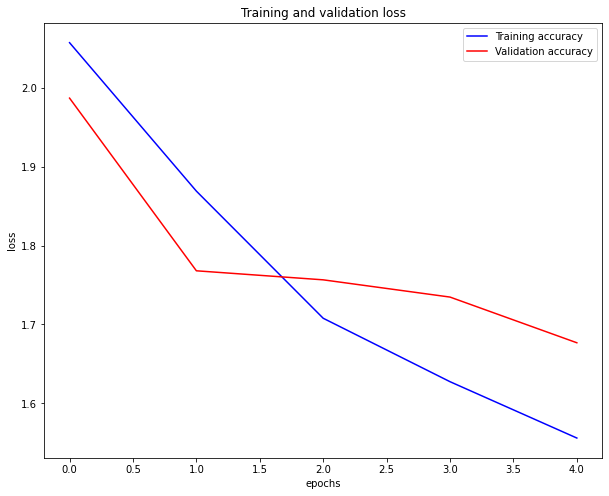

In [23]:
"""
    Code block to show the training and validation output for Gender model.

"""

accuracy = amodel.history['categorical_accuracy']
val_accuracy = amodel.history['val_categorical_accuracy']
loss = amodel.history['loss']
val_loss = amodel.history['val_loss']
epochs = range(len(accuracy))

fig = plt.figure(figsize=(10, 8)) 
plt.plot(epochs, accuracy, 'b', label = 'Training accuracy')
plt.plot(epochs,val_accuracy,'r', label= 'Validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Training and validation accuracy')
# txt = "Fig 1.b : "               # captioning the figure
# fig.text(.5, .05, txt, ha='center')
plt.legend()
plt.show()


fig = plt.figure(figsize=(10,8))
plt.plot(epochs, loss, 'b', label = 'Training accuracy')
plt.plot(epochs,val_loss,'r', label= 'Validation accuracy')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title("Training and validation loss")
plt.legend()

plt.show()


In [24]:
"""
    Code block to test the Age model.

"""

test_datagen = ImageDataGenerator(rescale=1./255)

test_agegenerator = test_datagen.flow_from_directory(
    'Data/test_age',
    target_size=(150, 150),
    color_mode='rgb',
    batch_size=1,
    class_mode=None,
    shuffle=False,
#     seed=42
)


STEP_SIZE_TEST=test_agegenerator.n//test_agegenerator.batch_size
test_agegenerator.reset()

# # model.evaluate_generator(generator=valid_generator,
# # steps=STEP_SIZE_VALID)

# predicting the age for test age dataset
predict=age_model.predict(test_agegenerator,
steps=STEP_SIZE_TEST,
verbose=1)

#converting age predicted ouput and getting desired output
age_pred = np.argmax(predict, axis=1)
age_desired = test_agegenerator.classes

# # labels = (train_generator.class_indices)
# # labels = dict((v,k) for k,v in labels.items())
# # predictions = [labels[k] for k in y_pred]

# saving the prediction for age in a textfile
filenames=test_agegenerator.filenames
print("class indices = " + str(train_agegenerator.class_indices))

results=pd.DataFrame({"Filenames":filenames,"Desired Output": age_desired, "Predicted Output": age_pred})
results.to_csv("age_prediction.txt",header= False, index= False, sep =' ')


Found 1008 images belonging to 8 classes.
1008/1008 [==============================] - 15s 15ms/step
class indices = {'(0-2)': 0, '(15-20)': 1, '(25-32)': 2, '(38-43)': 3, '(4-6)': 4, '(48-53)': 5, '(60-100)': 6, '(8-12)': 7}


[[111   0   2   4  18   0   0   4]
 [  2  28  28  19  37   6   4  29]
 [  1  16  58  19   1  10  12  12]
 [  4   3  31  12   0   0   2   6]
 [ 15   2   1   3  54   1   1   8]
 [  3  27  65  43   3  15  11  18]
 [  8  10  23  40   1  11  16  17]
 [  5  12  19   9  35   4   4  45]]


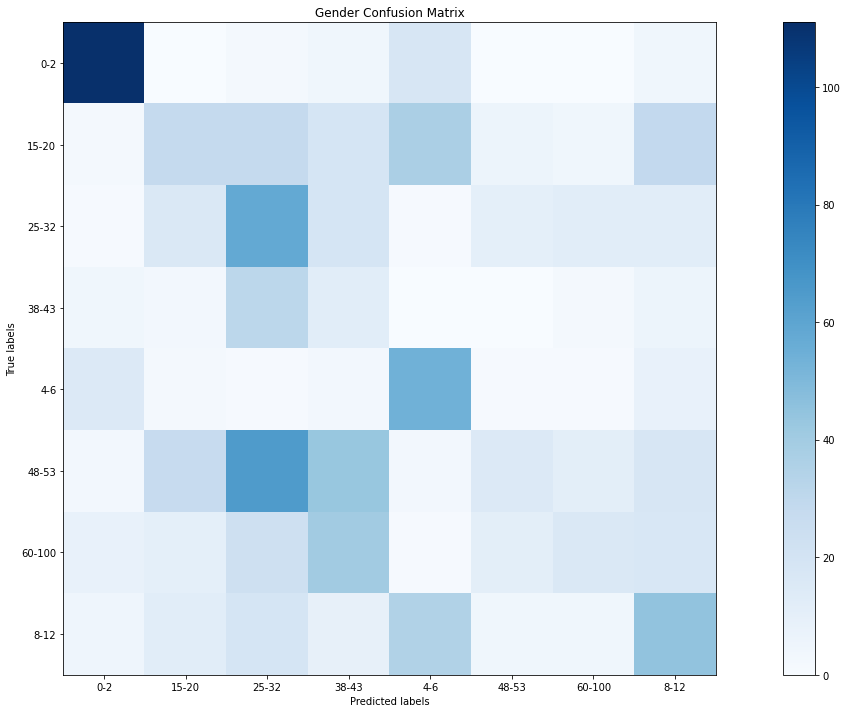

In [30]:
"""
    Code block to print the confusion matrix for age testing data
    
"""


#(0-2)': 0, '(15-20)': 1, '(25-32)': 2, '(38-43)': 3, '(4-6)': 4, '(48-53)': 5, '(60-100)': 6, '(8-12)': 7}
fig = plt.figure(figsize=(10, 8))

# age_matrix = confusion_matrix(age_pred, age_desired)
age_confusion_matrix = confusion_matrix(age_pred, age_desired )
print(age_confusion_matrix)
plt.imshow(age_confusion_matrix, cmap=plt.cm.Blues)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7], ['0-2', '15-20', '25-32', '38-43', '4-6', '48-53', '60-100', '8-12'])
plt.yticks([0, 1, 2, 3, 4, 5, 6, 7], ['0-2', '15-20', '25-32', '38-43', '4-6', '48-53', '60-100', '8-12'])
plt.title('Gender Confusion Matrix')
plt.colorbar()
plt.show()


In [27]:
"""
    Code block to get testing accuracy for the Age model.

"""
age_accuracy = accuracy_score(age_desired,age_pred)   
print("Accuracy of Age Model: " + str((age_accuracy *100))+ " %.")

# test_age = np.loadtxt('age_gender.txt', dtype=str)
# age_predict = test_age[:,1].astype('int')
# age_test = test_age[:,2].astype('int')

# accuracy = accuracy_score(age_test,age_predict)   
# print(accuracy *100)

Accuracy of Age Model: 33.63095238095239 %.


In [ ]:
"""
    Code block to do custom testing

"""



